# Exploratory Data Analysis
- Author: Jai Miles
- Date: 12/12/2002
- Purpose: This notebook is used for exploratory data analysis of the following dataset:

Data Citation:

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.


# Imports

Need to add venv to kernel
```python -m ipykernel install --user --name=<my_env_name>```
[Using venv with jupyter nb kernel](https://towardsdatascience.com/create-virtual-environment-using-virtualenv-and-add-it-to-jupyter-notebook-6e1bf4e03415)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import tree

import missingno as msno
import pywrangle as pw

# Data

## Load data

In [4]:
data_math_course = "data/student-mat.csv"
data_port_course = "data/student-por.csv"

df_math = pd.read_csv(data_math_course)
df_port = pd.read_csv(data_port_course)

In [5]:
df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
df_port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Merge data

In [7]:
course_dfs = (df_math, df_port)
df_data = pd.concat(course_dfs)
df_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
pw.print_df_info(df_math, df_port, df_data)


Name       |   Cols   |      Rows   |      Size
--------   |   ----   |   -------   |   -------
0          |     33   |       395   |     13035
1          |     33   |       649   |     21417
2          |     33   |      1044   |     34452
Abs Diff   |      0   |       649   |     21417
% Diff     |    0.0   |   164.304   |   164.304

Compared indices -1 & 0


Shows that dataframes at indices 0 & 1 were appropriately concatenated into the dataframe at index 2 (df_grades)

# Missing data

Check if there is missing data in the dataframe before proceeding.

<AxesSubplot:>

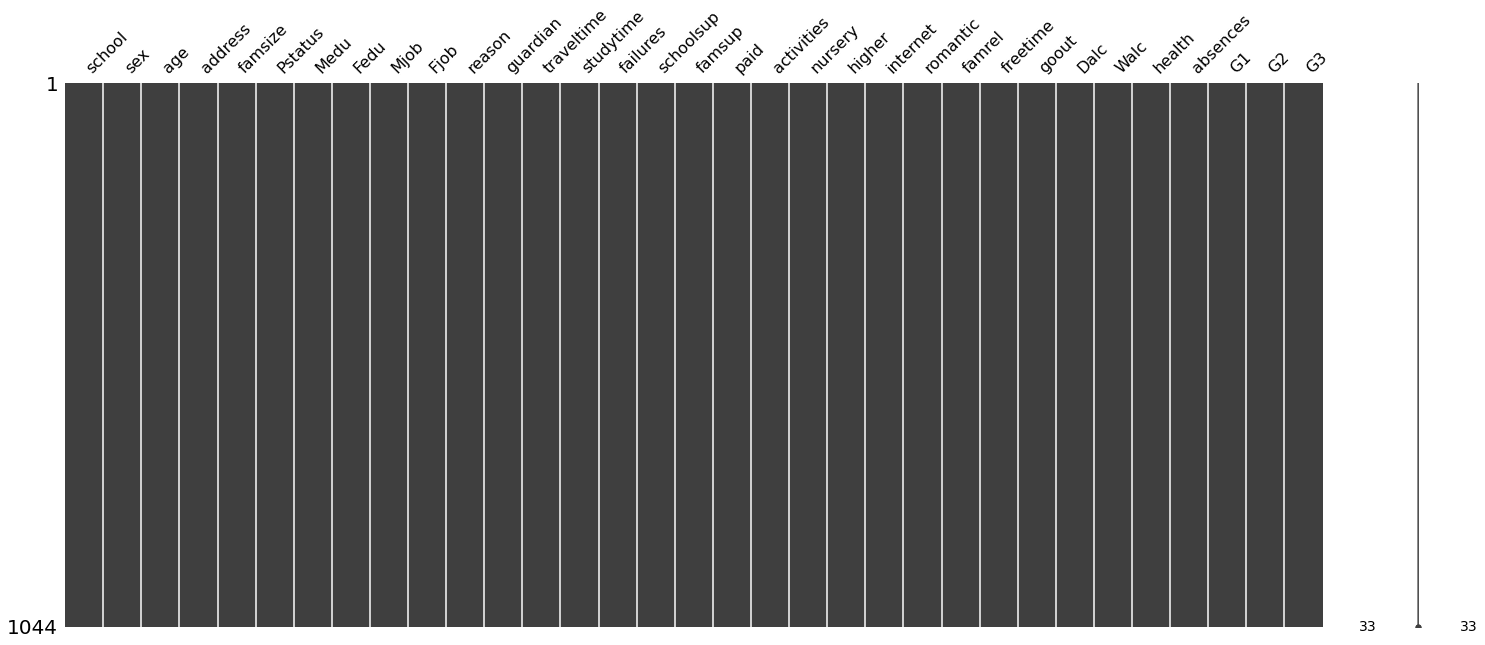

In [10]:
msno.matrix(df_data)

No missing data - what a treat!

# Clean Data

## Check need

In [11]:
df_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [12]:
## Column types
cat_cols = [c for c in df_data.columns if df_data[c].dtype == 'object']
num_cols = [c for c in df_data.columns if df_data[c].dtype != 'object']

In [13]:
header = '\n' + '#' * 5
print(header, "Categorical")
print(*cat_cols, sep = '\n')
print(header, "Numeric")
print(*num_cols, sep = '\n')


##### Categorical
school
sex
address
famsize
Pstatus
Mjob
Fjob
reason
guardian
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic

##### Numeric
age
Medu
Fedu
traveltime
studytime
failures
famrel
freetime
goout
Dalc
Walc
health
absences
G1
G2
G3


In [14]:
for c in cat_cols:
    print(c, ":", df_data[c].unique())

school : ['GP' 'MS']
sex : ['F' 'M']
address : ['U' 'R']
famsize : ['GT3' 'LE3']
Pstatus : ['A' 'T']
Mjob : ['at_home' 'health' 'other' 'services' 'teacher']
Fjob : ['teacher' 'other' 'services' 'health' 'at_home']
reason : ['course' 'other' 'home' 'reputation']
guardian : ['mother' 'father' 'other']
schoolsup : ['yes' 'no']
famsup : ['no' 'yes']
paid : ['no' 'yes']
activities : ['no' 'yes']
nursery : ['yes' 'no']
higher : ['yes' 'no']
internet : ['no' 'yes']
romantic : ['no' 'yes']


String data is already cleaned! But let's do it for fun anyways ~

In [26]:
df_data = pw.clean_all_strcols(df_data)


   Record   |   Column       |   Is Str Col   |   Clean Method
   ------   |   ----------   |   ----------   |   ------------
        1   |   school       |         True   |   lower       
        2   |   sex          |         True   |   lower       
        3   |   age          |        False   |   None        
        4   |   address      |         True   |   lower       
        5   |   famsize      |         True   |   lower       
        6   |   Pstatus      |         True   |   lower       
        7   |   Medu         |        False   |   None        
        8   |   Fedu         |        False   |   None        
        9   |   Mjob         |         True   |   lower       
       10   |   Fjob         |         True   |   lower       
       11   |   reason       |         True   |   lower       
       12   |   guardian     |         True   |   lower       
       13   |   traveltime   |        False   |   None        
       14   |   studytime    |        False   |   None

In [27]:
df_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,gp,f,18,u,gt3,a,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,gp,f,17,u,gt3,t,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,gp,f,15,u,le3,t,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,gp,f,15,u,gt3,t,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,gp,f,16,u,gt3,t,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [28]:
for c in cat_cols:
    print(c, ":", df_data[c].unique())

school : ['gp' 'ms']
sex : ['f' 'm']
address : ['u' 'r']
famsize : ['gt3' 'le3']
Pstatus : ['a' 't']
Mjob : ['at_home' 'health' 'other' 'services' 'teacher']
Fjob : ['teacher' 'other' 'services' 'health' 'at_home']
reason : ['course' 'other' 'home' 'reputation']
guardian : ['mother' 'father' 'other']
schoolsup : ['yes' 'no']
famsup : ['no' 'yes']
paid : ['no' 'yes']
activities : ['no' 'yes']
nursery : ['yes' 'no']
higher : ['yes' 'no']
internet : ['no' 'yes']
romantic : ['no' 'yes']


# Distribution

Break list into smaller chunks so can understand distribution.

In [16]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [17]:
chunk_num_cols = list(chunks(num_cols, 4))  # Create 4 evenly sized chunks
print(chunk_num_cols)

[['age', 'Medu', 'Fedu', 'traveltime'], ['studytime', 'failures', 'famrel', 'freetime'], ['goout', 'Dalc', 'Walc', 'health'], ['absences', 'G1', 'G2', 'G3']]


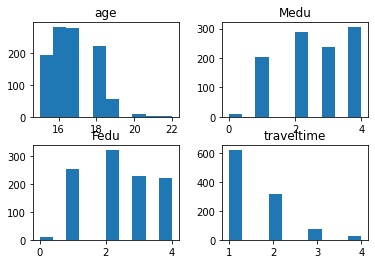

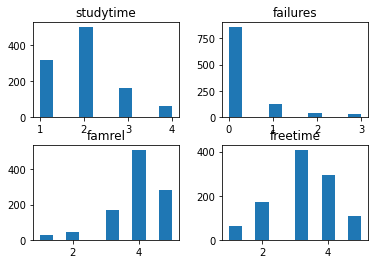

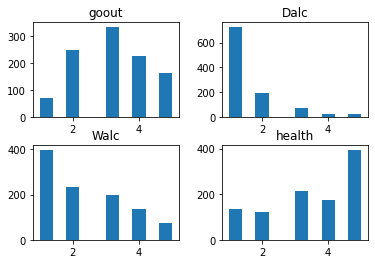

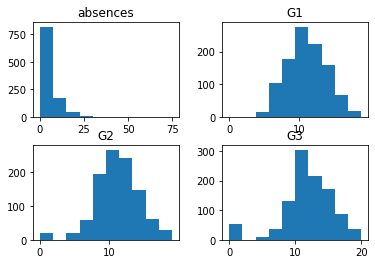

In [18]:
for num_c in chunk_num_cols:
    df_data[num_c].hist(grid = False)

Not all data is normally distributed. care!
- age, absences, and daily alcohol consumption are right skewed.

This would be important with regression analysis, but Decision Trees don't care!

# Correlation

Check for correlation between different variables

<AxesSubplot:title={'center':'Correlation of Numeric Columns'}>

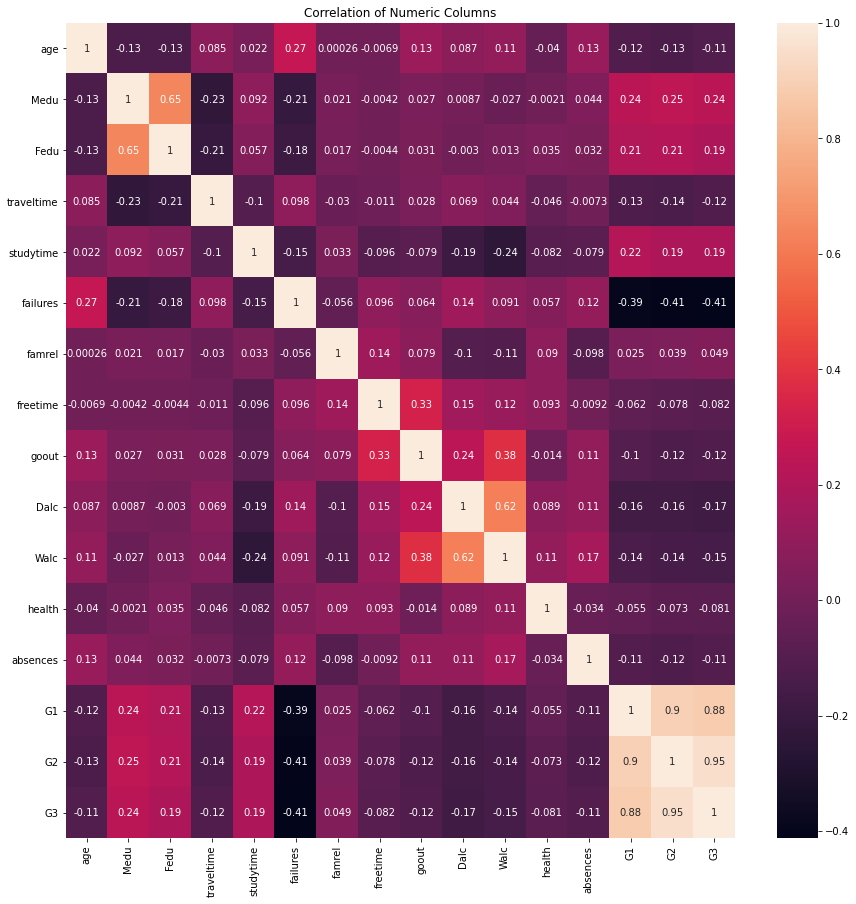

In [20]:
corr_method = "spearman"  ## Not normally distributed.

plt.figure(figsize = (15, 15))
plt.title("Correlation of Numeric Columns")
corr_data = df_data[num_cols].corr(method = corr_method)
sns.heatmap(corr_data, annot = True, cbar = True)

It appears that G1, G2, and G3 are all highly correlated. This is confirmed by existing education research; [Kotsiantis et al. 2004](https://www.tandfonline.com/doi/abs/10.1080/08839510490442058) found that student achievement is highly affected by previous performance.

My variable of interest is G3 (student's final grade). To select my explanatory regression predictors, I will classify the relationship of predictor variables to G3. I follow [Evans (1996)](https://psycnet.apa.org/record/1995-98499-000), suggestion to classify variables into 5 levels of correlation:
- .00-.19 “very weak”
- .20-.39 “weak”
- .40-.59 “moderate”
- .60-.79 “strong”
- .80-1.0 “very strong”

In [22]:
predictor_corrs = {
    0.19:[],     # very-weak
    0.39:[],     # weak
    0.59:[],     # moderate
    0.79:[],     # strong
    1:[]         # very-strong
}
outcome_var = "G3"
variable_corrs = []

for col in num_cols:
    if col == outcome_var: 
        continue
    var_corr = corr_data[col][outcome_var]
    variable_corrs.append((col, var_corr))
    
    for k, v in predictor_corrs.items():
        if var_corr <= k:
            v.append(col)
            break

variable_corrs.sort(key = lambda x: x[1], reverse = True)

In [23]:
for k, v in predictor_corrs.items():
    print(k, v)

0.19 ['age', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
0.39 ['Medu']
0.59 []
0.79 []
1 ['G1', 'G2']


In [24]:
for var, corr in variable_corrs:
    print(var, corr)

G2 0.9522989931786174
G1 0.8840428403485245
Medu 0.23831196704003327
Fedu 0.1899537317722802
studytime 0.1897934871378647
famrel 0.04938760906724494
health -0.08078521444471097
freetime -0.08182727632579963
absences -0.10897236400308521
age -0.11031794880311525
traveltime -0.11913802899243023
goout -0.12009742541115494
Walc -0.1493296562947421
Dalc -0.17187856405688476
failures -0.41266035246631894


It appears that G2 & G1 are highly correlated with G3. Other variables are correlated, but weak or very weakly.

Spearman's rho found 3 variables with practical correlation to G3: 
- G1 & G2 had a very-strong correlation (shown by previous research)
- Medu (Mother's education) had a weak correlation
- ['age', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'] had a very-weak correlation